# Deep Learning Assignment

## Iris dataset

### Import dependent libraries

In [1]:
import tensorflow as tf
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import plot_model
import numpy as np
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import *
from joblib import parallel_backend
import random


In [2]:
# read the data
path = 'iris.csv'
df = pd.read_csv(path, na_values=['NA','?'])

In [3]:
# Hint: use a DataFrame for both EDA and model development.
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualization

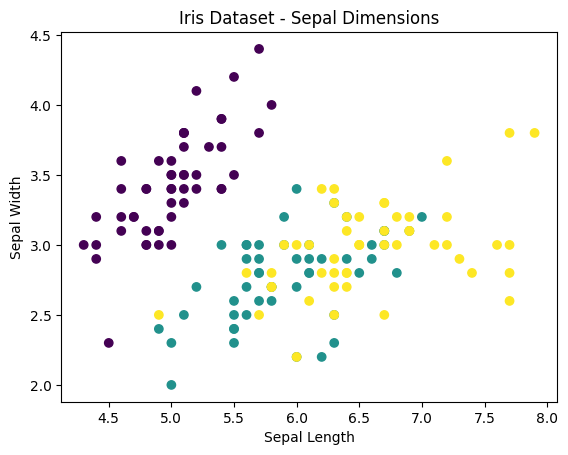

<Figure size 300x200 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
# Scatter plot visualization
plt.scatter(df['sepal_l'], df['sepal_w'], c=pd.factorize(df['species'])[0])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Dimensions')
plt.figure(figsize=(3, 2))
plt.show()
plt.savefig('plot.png')


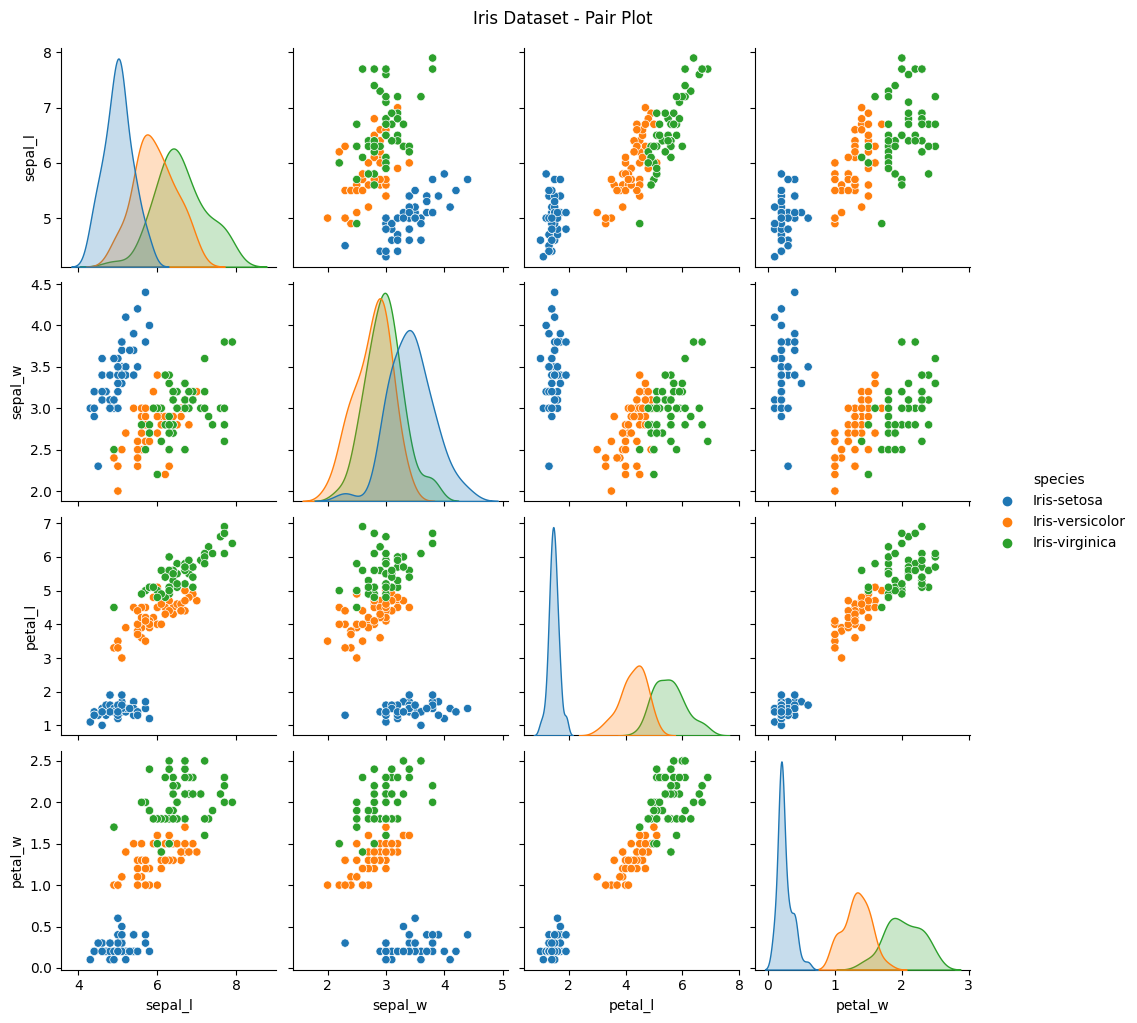

<Figure size 640x480 with 0 Axes>

In [6]:
sns.pairplot(df, hue='species')
plt.suptitle('Iris Dataset - Pair Plot', y=1.02)
plt.show()
plt.savefig('sns.png')

## Data Preprocessing:

In [7]:
#Label Encoding
lebeling=LabelEncoder()
df['species']=lebeling.fit_transform(df['species'])

In [8]:
df['species'].unique()

array([0, 1, 2])

In [9]:
#Data Scaling - Z score
df_target=df[['species']]
df_features=df.copy()
df_features.drop(['species'], inplace=True, axis=1)

In [10]:
scaler = StandardScaler()
names = df_features.columns
d = scaler.fit_transform(df_features)
df_features = pd.DataFrame(d, columns=names)

In [11]:
df_features.head()

,sepal_l,sepal_w,petal_l,petal_w
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
print('Input features shape :',df_features.shape )
print('Input Target variable shape :',df_target.shape )

Input features shape : (150, 4)
Input Target variable shape : (150, 1)


In [13]:
#join the feature in  DataFrame
df = pd.concat([df_features, df_target], axis=1)

In [14]:
df.shape

(150, 5)

In [15]:
# Convert the DataFrame to the (x,y) inputs.
x=df.iloc[:,:-1]
y=df['species']

In [16]:
#creates dummy variables for each unique category in the target variable
y = pd.get_dummies(y).values

In [17]:
# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
print("Features shape: ", x.shape)
print("Class shape: ", y.shape)

Features shape:  (150, 4)
Class shape:  (150, 3)


In [19]:
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (105, 4)
X test shape:  (45, 4)
Y train shape:  (105, 3)
Y test shape:  (45, 3)


### Build a sequential model

In [20]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model architecture
model = Sequential([
    Dense(10, input_shape=(4,), activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(6, activation='tanh'),
    Dense(3, activation='softmax')
])

# Compile the model
sgd = SGD(learning_rate=0.25)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    callbacks=[early_stopping], verbose=2, epochs=150)

Epoch 1/150
4/4 - 1s - loss: 0.8902 - accuracy: 0.5524 - val_loss: 0.5722 - val_accuracy: 0.8222 - 662ms/epoch - 165ms/step
Epoch 2/150
4/4 - 0s - loss: 0.5482 - accuracy: 0.7810 - val_loss: 0.4743 - val_accuracy: 0.7778 - 27ms/epoch - 7ms/step
Epoch 3/150
4/4 - 0s - loss: 0.4961 - accuracy: 0.7810 - val_loss: 0.4232 - val_accuracy: 0.8000 - 26ms/epoch - 7ms/step
Epoch 4/150
4/4 - 0s - loss: 0.4130 - accuracy: 0.8571 - val_loss: 0.4036 - val_accuracy: 0.8444 - 29ms/epoch - 7ms/step
Epoch 5/150
4/4 - 0s - loss: 0.3793 - accuracy: 0.8667 - val_loss: 0.3689 - val_accuracy: 0.8444 - 29ms/epoch - 7ms/step
Epoch 6/150
4/4 - 0s - loss: 0.3527 - accuracy: 0.8667 - val_loss: 0.3308 - val_accuracy: 0.8889 - 28ms/epoch - 7ms/step
Epoch 7/150
4/4 - 0s - loss: 0.3125 - accuracy: 0.8952 - val_loss: 0.3044 - val_accuracy: 0.8889 - 29ms/epoch - 7ms/step
Epoch 8/150
4/4 - 0s - loss: 0.2824 - accuracy: 0.8952 - val_loss: 0.2532 - val_accuracy: 0.9333 - 58ms/epoch - 15ms/step
Epoch 9/150
4/4 - 0s - loss:

###  Evaluate the model

In [21]:
# Evaluate the model's performance
predictions = model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(predictions, axis=1)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("\n** Confusion Matrix:\n", confusion_mat)

# Generate and print the classification report
classification_rep = classification_report(y_test_classes, y_pred_classes)
print("\n** Result Report:\n", classification_rep)

# Evaluate the test loss and accuracy
test_scores = model.evaluate(x_test, y_test, verbose=2)
test_loss = test_scores[0]
test_accuracy = test_scores[1]

print("\n** Test loss:\n", test_loss)
print("\n** Test accuracy:\n", test_accuracy)

2/2 [==============================] - 0s 4ms/step

** Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]

** Result Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

2/2 - 0s - loss: 0.1219 - accuracy: 0.9556 - 22ms/epoch - 11ms/step

** Test loss:
 0.12193994224071503

** Test accuracy:
 0.9555555582046509


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


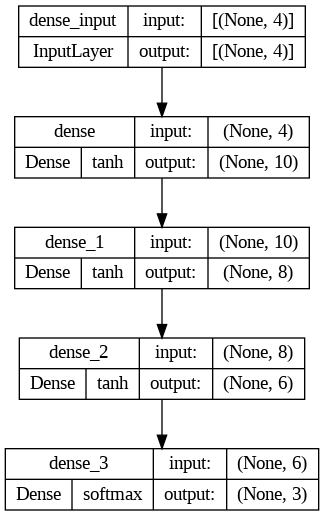

In [23]:
# plot the model
plot_model(model, show_shapes=True, show_layer_activations=True)

# Descrption for Models Evaluation

Tanh and softmax functions were used as activation functions in the experiment, which was carried out using a sequential API architecture. Using a loss function based on categorical_crossentropy, the optimizer applied SGD. Additionally, 150 was used as the epoch value in the experiments. Based on the results, the experiment's accuracy rate was 95.5%. But the test loss rate was only 0.12.


# Reflection

This task presented several challenges, particularly when dealing with multiclass data and evaluating the model's performance:

- One of the difficulties encountered was determining an appropriate number of epochs for training. Training a model for too many epochs can lead to overfitting, which can be computationally expensive, especially with large datasets or complex models. In this case, the model's overfitting was a result of training for an excessive number of epochs.

- Another challenge was selecting the optimal learning rate for the Stochastic Gradient Descent (SGD) optimizer. Finding the right learning rate is crucial, as a value that is too low can prolong and hinder the training process, while a value that is too high can cause the model to diverge and fail to learn effectively.

However, despite these challenges, the assignment provided an opportunity to apply the theoretical concepts learned during lectures. It allowed for practical implementation of a Sequential API model, which achieved an  accuracy rate of 95.5%. The code overall demonstrates a strong understanding of training and evaluating deep learning models for classification.